In [201]:

import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime
plt.style.use('ggplot')
from matplotlib.pyplot import figure

# %matplotlib incline
matplotlib.rcParams['figure.figsize'] = (12,8) #adjusts the configuration of the plot we are going to create

# Read in the data
df = pd.read_csv('/Users/sarahhbang/PycharmProjects/PortfolioProjects/movies.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)



In [202]:
# Looking at the data
df.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0


In [203]:
# lets see if there is a missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())*100
    print('{} - {}%'.format(col, pct_missing))
    
#28% of budget has missing values

name - 0.0%
rating - 1.004173187271779%
genre - 0.0%
year - 0.0%
released - 0.02608242044861763%
score - 0.03912363067292645%
votes - 0.03912363067292645%
director - 0.0%
writer - 0.03912363067292645%
star - 0.013041210224308816%
country - 0.03912363067292645%
budget - 28.31246739697444%
gross - 2.464788732394366%
company - 0.2217005738132499%
runtime - 0.05216484089723526%


In [204]:
# change data types for some columns
df = df.fillna(0)
df['budget'] = df['budget'].astype(int)
df['gross'] = df['gross'].astype(int)
df['votes'] = df['votes'].astype(int)

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [205]:
#Extract just the year from released date. Year column is sometimes incorrect
df['yearcorrect'] = df['released'].str.extract(r"(\s+\d{4})")
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [206]:
# Sort by highest grossing films

df = df.sort_values(by=['gross'],inplace=False, ascending = False) 

df.head()

#Avatar has the highest gross

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


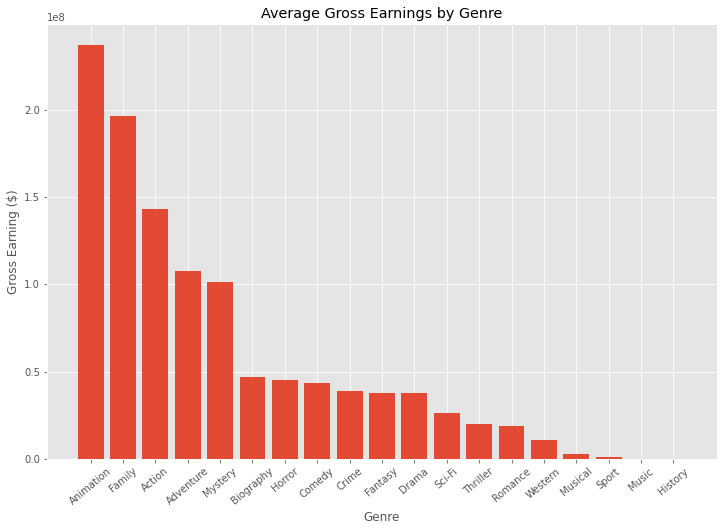

In [207]:
# Looking at gross vs genre

gross_mean = df.groupby('genre')['gross'].mean()
gross_mean = gross_mean.sort_values(ascending = False)

plt.bar(gross_mean.index, gross_mean, width = 0.8)
plt.title('Average Gross Earnings by Genre')
plt.xlabel('Genre')
plt.xticks(rotation = '40', fontsize = '10')
plt.ylabel('Gross Earning ($)')

plt.show()

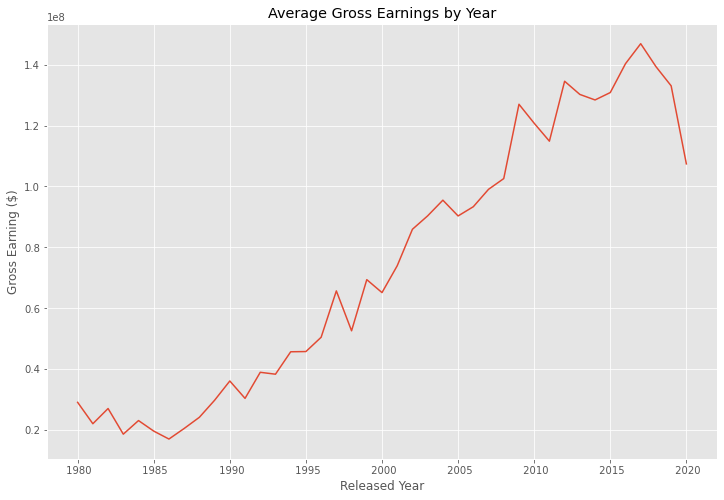

In [208]:
# gross earning by year

gross_mean = df.groupby('yearcorrect')['gross'].mean()

plt.plot(gross_mean.index, gross_mean)
plt.title('Average Gross Earnings by Year')
plt.xlabel('Released Year')
plt.xticks(np.arange(0, len(gross_mean.index), 5))

plt.ylabel('Gross Earning ($)')

plt.show()

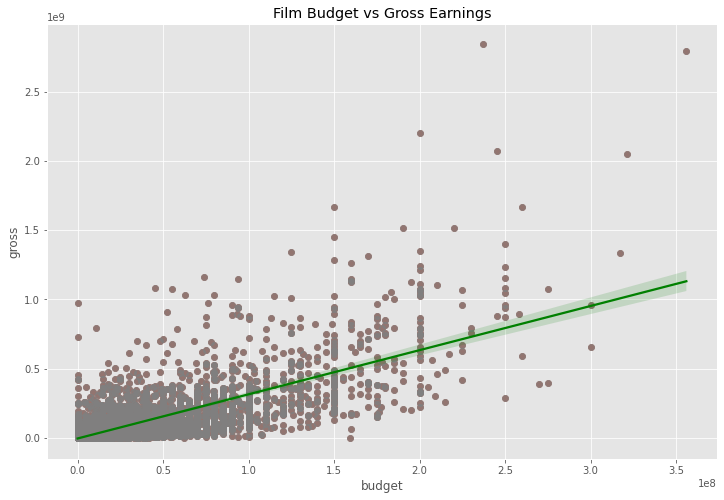

In [209]:


# Looking at factors that correlate with high gross

# Scatter plot with Budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Film Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget')

sb.regplot(x='budget',y='gross', data=df, scatter_kws={'color':'grey'}, line_kws={'color':'green'} )

plt.show()

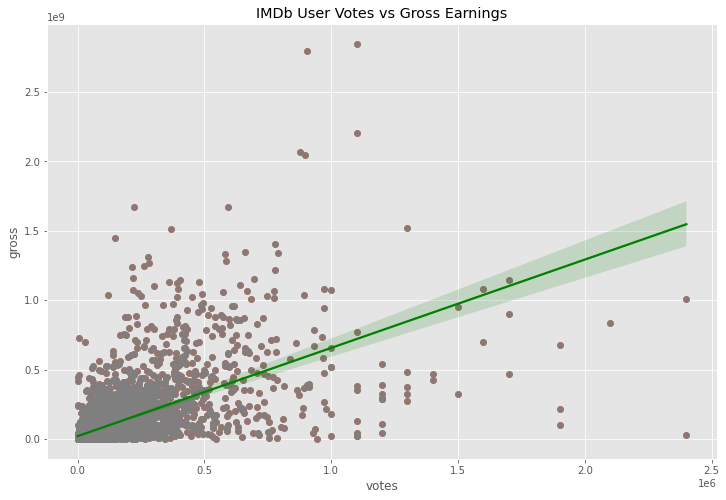

In [210]:
# Scatter plot with gross vs votes
plt.scatter(x=df['votes'], y=df['gross'])
plt.title('IMDb User Votes vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Number of User Votes')

sb.regplot(x='votes',y='gross', data=df, scatter_kws={'color':'grey'}, line_kws={'color':'green'} )

plt.show()

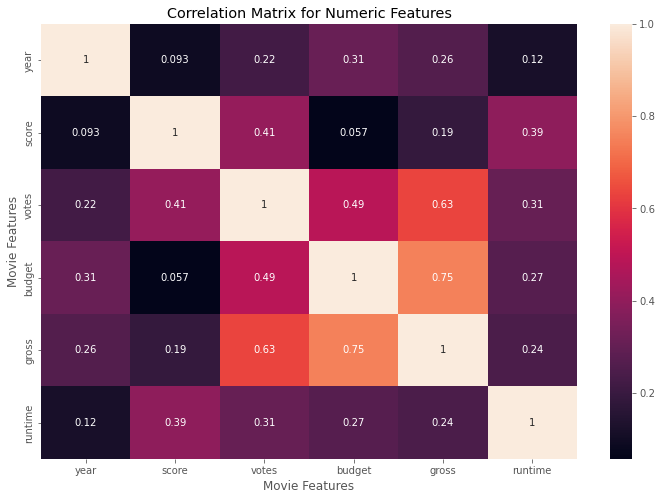

In [211]:
# Looking at correlation

correlation_matrix = df.corr(method='pearson')

sb.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [212]:
# Looking at company. Changing it to numerical value to estimate correlation
df_numerized = df

for col_name in df_numerized :
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,533,6,0,2009,697,7.8,1100000,1155,1779,2335,56,237000000,2847246203,2254,162.0,29
7445,535,6,0,2019,184,8.4,903000,162,744,2242,56,356000000,2797501328,1607,181.0,39
3045,6896,6,6,1997,705,7.8,1100000,1155,1779,1596,56,200000000,2201647264,2254,194.0,17
6663,5144,6,0,2015,699,7.8,876000,1125,2551,525,56,245000000,2069521700,1541,138.0,35
7244,536,6,0,2018,193,8.4,897000,162,744,2242,56,321000000,2048359754,1607,149.0,38


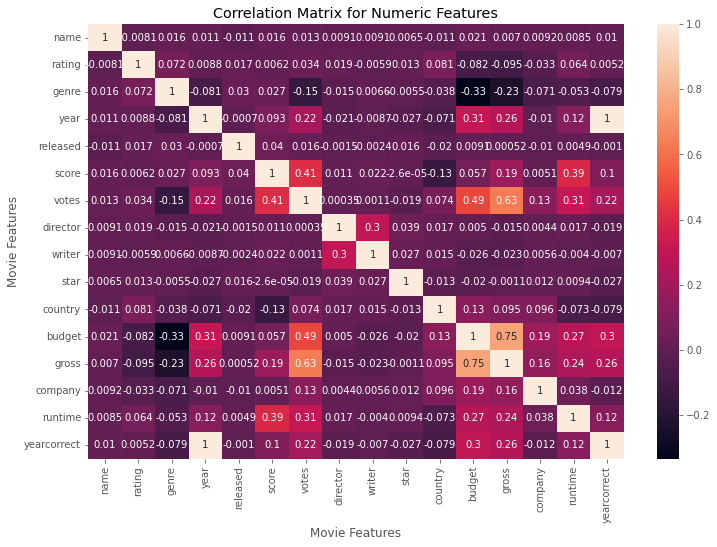

In [213]:
correlation_matrix = df_numerized.corr(method='pearson')

sb.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

# company not correlated with gross earnings

In [214]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

sorted_pairs = corr_pairs.sort_values()

high_corr = sorted_pairs[(sorted_pairs)>0.5]

high_corr

votes        gross          0.632870
gross        votes          0.632870
budget       gross          0.750157
gross        budget         0.750157
yearcorrect  year           0.995306
year         yearcorrect    0.995306
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [215]:
# budget and IMDb user votes have the highest correlation with gross earnings. 